In [1]:
import numpy as np
import matplotlib.pyplot as plt
import stats
from scipy.stats import norm
from functions import max_sez_aurea as maxa
from iminuit import Minuit
from iminuit.cost import ExtendedUnbinnedNLL,LeastSquares

In [2]:
def parab(x,a,b,c):
    x = np.array(x)
    return a*np.power(x,2) + b*np.array(x) + c

In [3]:
def gauss(x,mu,sigma):
    return stats.toy_Gauss().normal(mu,sigma)

In [4]:
def f(x,a,b,c,mu,sigma,totn):
    return totn*(parab(x,a,b,c) + 2*norm.pdf(x,mu,sigma))

In [5]:
def f2(x,a,b,c):
    return parab(x,a,b,c)

In [6]:
a, b, c = -0.2, 0.8, 1
mu, sigma = 2, 0.25

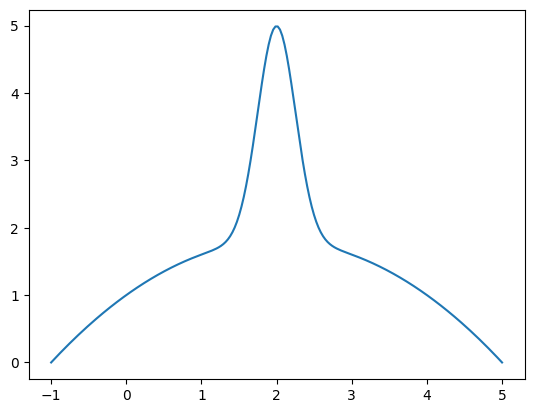

In [7]:
x = np.linspace(-1,5,200)
y = [f(x,a,b,c,mu,sigma,1.0) for x in x]
plt.plot(x,y)
plt.show()

In [8]:
xmax,ymax = maxa(f, -1.5,5, a,b,c,mu,sigma,1.0)
print("x = ",xmax,"y = ",ymax)

x =  1.999980275409694 y =  4.991538233200065


In [9]:
def try_catch(f,xmin,xmax,fmax,N,*args):
    data = []
    counter = 0
    for i in range(N):
        x = np.random.uniform(xmin,xmax)
        y = np.random.uniform(0,fmax)
        if f(x,*args) > y:
            data.append(x)
            counter +=1
    p = counter/N
    A = (xmax-xmin)*fmax
    return data
    

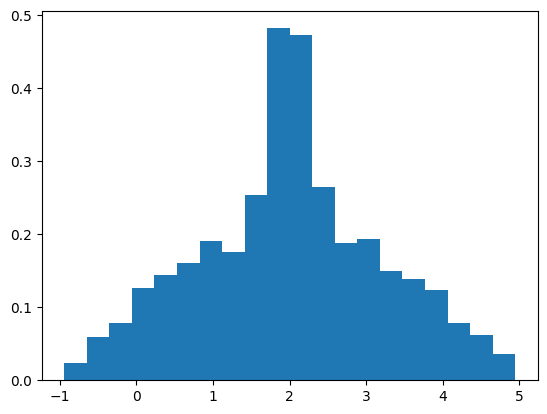

In [10]:
data = try_catch(f,-1,5,ymax,10000,a,b,c,mu,sigma,1.0)
bin_content, bin_edges, boh = plt.hist(data,bins=20,density=True)
plt.show()

In [11]:
#data2 = try_catch(f2,-1,5,maxa(f2,-1.5,5,a,b,c)[1],1000,a,b,c)
#bin_content, bin_edges, boh = plt.hist(data2,bins=20)
#plt.show()

In [13]:
yerr= 0.05*np.ones(len(bin_content))

cost = LeastSquares(bin_edges[1:],bin_content,yerr,f)
my_minuit = Minuit(cost, a=-0.2, b=0.8, c=1,mu=2,sigma=.3,totn=0.1)

#my_minuit = Minuit(cost,a=-0.2, b=0.8,c=1 )

my_minuit.migrad()
my_minuit.hesse()
display(my_minuit)
print("Q squared",my_minuit.fval)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.6095 (χ²/ndof = 0.0)     │              Nfcn = 255              │
│ EDM = 3.5e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a     │   -0.22   │   0.09    │            │            │         │         │       │
│ 1 │ b     │    1.0    │    0.4    │            │            │         │         │       │
│ 2 │ c     │   0.95    │   0.29    │            │            │         │         │       │
│ 3 │ mu    │   2.15    │   0.04    │            │            │         │         │       │
│ 4 │ sigma │   0.24    │   0.05    │            │            │         │         │       │
│ 5 │ totn  │   0.101   │   0.021   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────┐
│       │        a        b        c       mu    sigma     totn │
├───────┼───────────────────────────────────────────────────────┤
│     a │  0.00787   -0.034   -0.014   0.0002   0.0028   1.7e-3 │
│     b │   -0.034     0.15     0.05  -0.0009  -0.0121  -7.2e-3 │
│     c │   -0.014     0.05   0.0871  -0.0000  -0.0082  -4.8e-3 │
│    mu │   0.0002  -0.0009  -0.0000  0.00174   0.0001        0 │
│ sigma │   0.0028  -0.0121  -0.0082   0.0001  0.00269   0.8e-3 │
│  totn │   1.7e-3  -7.2e-3  -4.8e-3        0   0.8e-3 0.000462 │
└───────┴───────────────────────────────────────────────────────┘

Q squared 0.6094922396910248
